# Summary of Tensorflow basics.


Parag K. Mital, Jan 2016. | David O. Ojo, Jul 2017

## Import Tensorflow and Pyplot 

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from skimage import data

## tf.Graph represents a collection of tf.Operations
#### tf.Graph represents a collection of tf.Operations. You can create operations by writing out equations. By default, there is a graph: tf.get_default_graph() and any new operations are added to this graph. The result of a tf.Operation is a tf.Tensor, which holds the values.

# First a tf.Tensor

In [3]:
n_values = 32
x = tf.linspace(-3.0, 3.0, n_values)

# Construct a tf.Session to execute the graph.

In [4]:
sess = tf.Session()
result = sess.run(x)

# Alternatively pass a session to the eval fn
##### x.eval() does not work, as it requires a session!

In [5]:
x.eval(session=sess)

array([-3.        , -2.80645156, -2.61290312, -2.41935492, -2.22580647,
       -2.03225803, -1.83870971, -1.64516139, -1.45161295, -1.25806451,
       -1.06451619, -0.87096786, -0.67741942, -0.48387098, -0.29032278,
       -0.09677434,  0.0967741 ,  0.29032254,  0.48387098,  0.67741919,
        0.87096763,  1.06451607,  1.25806427,  1.45161295,  1.64516115,
        1.83870935,  2.03225803,  2.22580624,  2.41935444,  2.61290312,
        2.80645132,  3.        ], dtype=float32)

# We can setup an interactive session 
### if we don't want to keep passing the session around:

In [6]:
sess.close()
sess = tf.InteractiveSession()

In [7]:
# Now this will work!
x.eval()

array([-3.        , -2.80645156, -2.61290312, -2.41935492, -2.22580647,
       -2.03225803, -1.83870971, -1.64516139, -1.45161295, -1.25806451,
       -1.06451619, -0.87096786, -0.67741942, -0.48387098, -0.29032278,
       -0.09677434,  0.0967741 ,  0.29032254,  0.48387098,  0.67741919,
        0.87096763,  1.06451607,  1.25806427,  1.45161295,  1.64516115,
        1.83870935,  2.03225803,  2.22580624,  2.41935444,  2.61290312,
        2.80645132,  3.        ], dtype=float32)

# Now a tf.Operation
#### We'll use our values from [-3, 3] to create a Gaussian Distribution

In [8]:
sigma = 1.0
mean = 0.0
z = (tf.exp(-(tf.pow(x - mean, 2.0) /
                   (2.0 * tf.pow(sigma, 2.0)))) *
     (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))

### By default, new operations are added to the default Graph

In [9]:
assert z.graph is tf.get_default_graph()

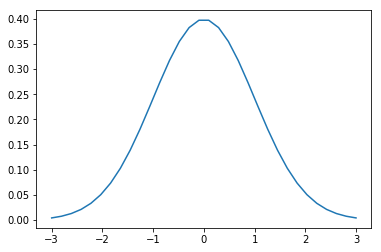

In [10]:
# %% Execute the graph and plot the result
plt.plot(x.eval(), z.eval())
plt.show()

In [11]:
# %% We can find out the shape of a tensor like so:
print(z.get_shape())

(32,)


In [12]:
# %% Or in a more friendly format
print(z.get_shape().as_list())

[32]


### Sometimes we may not know the shape of a tensor until it is computed in the graph.  In that case we should use the tf.shape fn, which will return a Tensor which can be eval'ed, rather than a discrete value of tf.Dimension

In [13]:
print(tf.shape(z).eval())

[32]


In [14]:
# %% We can combine tensors like so:
print(tf.stack([tf.shape(z), tf.shape(z), [3], [4]]).eval())

[[32]
 [32]
 [ 3]
 [ 4]]


In [15]:
# %% Let's multiply the two to get a 2d gaussian
z_2d = tf.matmul(tf.reshape(z, [n_values, 1]), tf.reshape(z, [1, n_values]))

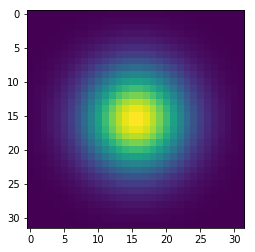

In [16]:
# %% Execute the graph and store the value that `out` represents in `result`.
plt.imshow(z_2d.eval())
plt.show()

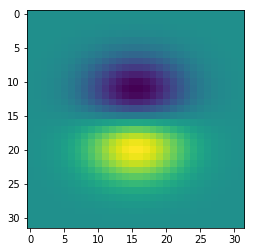

In [17]:
# %% For fun let's create a gabor patch:
x = tf.reshape(tf.sin(tf.linspace(-3.0, 3.0, n_values)), [n_values, 1])
y = tf.reshape(tf.ones_like(x), [1, n_values])
z = tf.multiply(tf.matmul(x, y), z_2d)
plt.imshow(z.eval())
plt.show()

# We can also list all the operations of a graph:

In [18]:
ops = tf.get_default_graph().get_operations()
print([op.name for op in ops])

['LinSpace/start', 'LinSpace/stop', 'LinSpace/num', 'LinSpace', 'sub/y', 'sub', 'Pow/y', 'Pow', 'Pow_1/x', 'Pow_1/y', 'Pow_1', 'mul/x', 'mul', 'truediv', 'Neg', 'Exp', 'Sqrt/x', 'Sqrt', 'mul_1/x', 'mul_1', 'truediv_1/x', 'truediv_1', 'mul_2', 'Shape', 'Shape_1', 'Shape_2', 'stack/2_1', 'stack/3_1', 'stack', 'Reshape/shape', 'Reshape', 'Reshape_1/shape', 'Reshape_1', 'MatMul', 'LinSpace_1/start', 'LinSpace_1/stop', 'LinSpace_1/num', 'LinSpace_1', 'Sin', 'Reshape_2/shape', 'Reshape_2', 'ones_like/Shape', 'ones_like/Const', 'ones_like', 'Reshape_3/shape', 'Reshape_3', 'MatMul_1', 'Mul']


## Lets try creating a generic function for computing the same thing:

In [19]:
def gabor(n_values=32, sigma=1.0, mean=0.0):
    x = tf.linspace(-3.0, 3.0, n_values)
    z = (tf.exp(-(tf.pow(x - mean, 2.0) /
                       (2.0 * tf.pow(sigma, 2.0)))) *
         (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))
    gauss_kernel = tf.matmul(
        tf.reshape(z, [n_values, 1]), tf.reshape(z, [1, n_values]))
    x = tf.reshape(tf.sin(tf.linspace(-3.0, 3.0, n_values)), [n_values, 1])
    y = tf.reshape(tf.ones_like(x), [1, n_values])
    gabor_kernel = tf.multiply(tf.matmul(x, y), gauss_kernel)
    return gabor_kernel

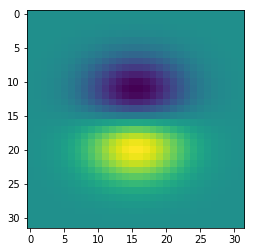

In [20]:
# %% Confirm this does something:
plt.imshow(gabor().eval())
plt.show()